In [1]:
from matplotlib import pyplot as plt
from sparrow import Protein
from sparrow.predictors import batch_predict

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


In [18]:
# flag which decides if we use scaled network or not
use_scaled = False


# select filename to use
if use_scaled:
    filename = 'test_data/scaled_rg_nat_meth_test.tsv'
    predictor = 'scaled_rg'
else:
    filename = 'test_data/rg_nat_meth_test.tsv'
    predictor = 'rg'
    
with open(filename,'r') as fh:
    content = fh.readlines()

# build up datastructures
all_seqs = []
sim_data = {}

# cycle over sequences
for line in content:
    sline = line.strip().split()

    if sline[0].find('synth') > -1:
        continue

    # get amino acid sequence
    seq = sline[1]

    # get rg from data
    if use_scaled:
        rg = float(sline[2]) * np.sqrt(len(seq))
    else:
        rg = float(sline[2])

    
    sim_data[sline[1]] = rg
    all_seqs.append(seq)

# run predictions
prediction_data = batch_predict.batch_predict(all_seqs, 
                                              network=predictor,
                                              return_seq2prediction=True)

    
# construct lists of data
sims = []
pred = []
n = []
delta = []
for k in prediction_data:
    sims.append(sim_data[k])
    pred.append(prediction_data[k])
    n.append(len(k))
    delta.append(sim_data[k] - prediction_data[k])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 464/464 [00:05<00:00, 90.92it/s]


In [19]:
np.corrcoef(sims,pred)

array([[1.        , 0.99913278],
       [0.99913278, 1.        ]])

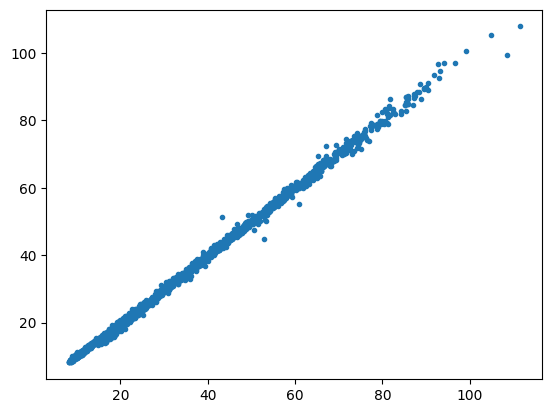

In [20]:
plt.plot(sims,pred,'.')